Task 1
SIVB has no difference between adjusted close price and close price
Task 2
63.70500564575195 is the highest adjusted close price of AIG
17.483623504638672 is the lowest adjusted close price of AIG
145.3667449951172 is the highest adjusted close price of GE
43.81699752807617 is the lowest adjusted close price of GE
238.9300842285156 is the highest adjusted close price of IEX
111.5792999267578 is the lowest adjusted close price of IEX
755.030029296875 is the highest adjusted close price of SIVB
130.97999572753906 is the lowest adjusted close price of SIVB
Task 3
AIG has a mean of 9.115100861132148e-05
AIG has a median of 0.0007074433132685989
AIG has a maximum of 0.1723411272513712
AIG has a minimum of -0.23376085446053488
GE has a mean of -0.0004130192267435012
GE has a median of -0.0009652750869540912
GE has a maximum of 0.137410982654356
GE has a minimum of -0.16439405665838225
IEX has a mean of 0.0005053373082589004
IEX has a median of 0.001048659414141834
IEX has a maximum of

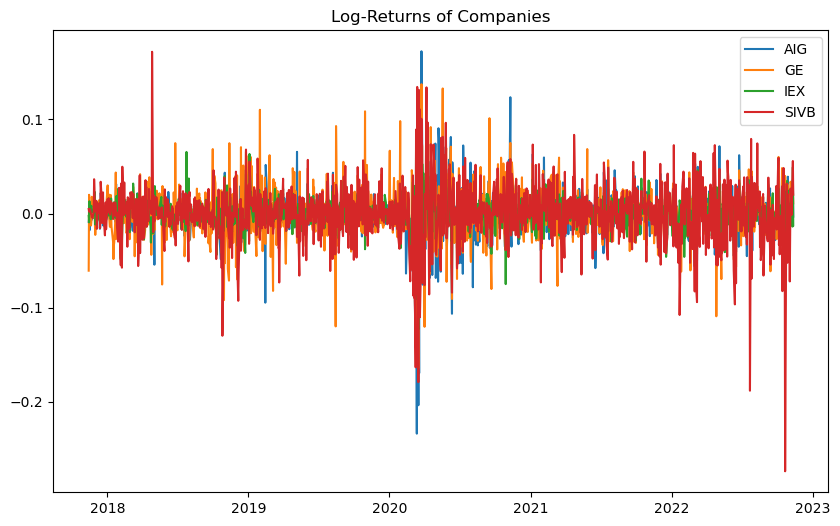

Task 8


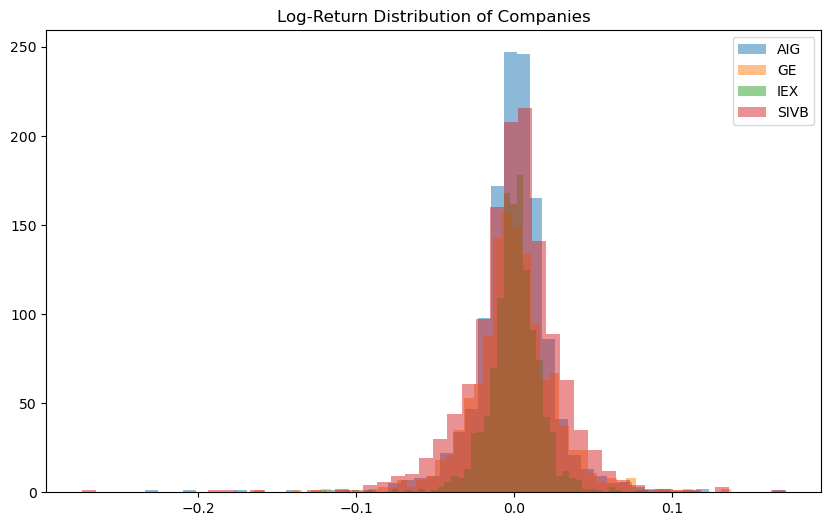

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_AIG = pd.read_csv('data/AIG.csv')
df_AIG.Name = 'AIG'
df_GE = pd.read_csv('data/GE.csv')
df_GE.Name = 'GE'
df_IEX = pd.read_csv('data/IEX.csv')
df_IEX.Name = 'IEX'
df_SIVB = pd.read_csv('data/SIVB.csv')
df_SIVB.Name = 'SIVB'


In [ ]:
print("Task 1")
for df in [df_AIG, df_GE, df_IEX, df_SIVB]:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    if df['Adj Close'].equals(df['Close']):
        print(df.Name + ' has no difference between adjusted close price and close price')


In [ ]:
print("Task 2")
for df in [df_AIG, df_GE, df_IEX, df_SIVB]:
    print(str(df['Adj Close'].max()) + ' is the highest adjusted close price of ' + df.Name)
    print(str(df['Adj Close'].min()) + ' is the lowest adjusted close price of ' + df.Name)



In [ ]:
print("Task 3")
log_returns = {}
for df in [df_AIG, df_GE, df_IEX, df_SIVB]:
    log_returns[df.Name] = df['Adj Close'].pct_change().apply(lambda x: np.log(1 + x))
    print(df.Name + ' has a mean of ' + str(log_returns[df.Name].mean()))
    print(df.Name + ' has a median of ' + str(log_returns[df.Name].median()))
    print(df.Name + ' has a maximum of ' + str(log_returns[df.Name].max()))
    print(df.Name + ' has a minimum of ' + str(log_returns[df.Name].min()))

In [ ]:
print("Task 4")
max_gain_dates = {}
max_loss_dates = {}
for df in [df_AIG, df_GE, df_IEX, df_SIVB]:
    log_returns_company = df['Adj Close'].pct_change().apply(lambda x: np.log(1 + x))
    max_gain_dates[df.Name] = log_returns_company.idxmax()
    max_loss_dates[df.Name] = log_returns_company.idxmin()
    print("The date with the highest gain for " + df.Name + " is " + str(log_returns_company.idxmax()))
    print("The date with the highest loss for " + df.Name + " is " + str(log_returns_company.idxmin()))

In [ ]:
print("Task 5")

weekly_volumes = {}
for df in [df_AIG, df_GE, df_IEX, df_SIVB]:
    weekly_volumes[df.Name] = df['Volume'].resample('W').mean()
    print("The week with the highest volume for " + df.Name + " is " + str(weekly_volumes[df.Name].idxmax()))


In [ ]:
print("Task 6")
total_returns = {}
for df in [df_AIG, df_GE, df_IEX, df_SIVB]:
    total_returns[df.Name] = df['Adj Close'].pct_change().apply(lambda x: np.log(1 + x)).sum()
    print(f"Total return for {df.Name}: {total_returns[df.Name]}")


In [ ]:
print("Task 7")
plt.figure(figsize=(10, 6))
for df in [df_AIG, df_GE, df_IEX, df_SIVB]:
    plt.plot(df['Adj Close'].pct_change().apply(lambda x: np.log(1 + x)), label=df.Name)
plt.title('Log-Returns of Companies')
plt.legend()
plt.show()

In [ ]:
print("Task 8")
plt.figure(figsize=(10, 6))
for df in [df_AIG, df_GE, df_IEX, df_SIVB]:
    plt.hist(df['Adj Close'].pct_change().apply(lambda x: np.log(1 + x)), bins=50, label=df.Name, alpha=0.5)
plt.title('Log-Return Distribution of Companies')
plt.legend()
plt.show()
